$B \rightarrow K^* \ell \ell$  machine learning experiment

Setup

In [1]:
from torch.nn import MSELoss, CrossEntropyLoss
import matplotlib.pyplot as plt

from helpers.datasets.make_and_save.aggregated_signal import Aggregated_Signal_Dataframe_Handler
from helpers.datasets.constants import Names_of_Levels, Names_of_q_Squared_Vetos, Raw_Signal_Trial_Ranges, Numbers_of_Events_per_Set, Names_of_Splits, Names_of_Labels
from helpers.experiment.experiment import CNN_Group, Deep_Sets_Group, Event_by_Event_Group
from helpers.experiment.results_table import Results_Table
from helpers.experiment.constants import Paths_to_Directories
from helpers.models.hardware_util import select_device
from helpers.experiment.experiment import evaluate_model
from helpers.datasets.settings.settings import Binned_Sets_Dataset_Settings
from helpers.datasets.datasets import Unbinned_Sets_Dataset, Binned_Sets_Dataset
from helpers.datasets.make_and_save.preprocessing import apply_q_squared_veto

results_table = Results_Table()
device = select_device()

Device:  cuda


Remake aggregated signal dataframe files

In [ ]:
for  level in (Names_of_Levels().generator, Names_of_Levels().detector):
    for trial_range in Raw_Signal_Trial_Ranges().tuple_:
        
        Aggregated_Signal_Dataframe_Handler(
            path_to_main_datasets_dir=Paths_to_Directories().path_to_main_datasets_dir,
            level=level,
            trial_range=trial_range
        ).make_and_save(Paths_to_Directories().path_to_raw_signal_dir)

Deep Sets

In [ ]:
deep_sets_group = Deep_Sets_Group(
    num_sets_per_label=50,
    num_sets_per_label_sensitivity=2_000,
    q_squared_veto=Names_of_q_Squared_Vetos().loose,
    std_scale=True,
    shuffle=True,
    loss_fn=MSELoss(),
    learning_rate=3e-4, # 3e-4
    learning_rate_scheduler_reduction_factor=0.99, # 0.9
    size_of_training_batch=32,
    size_of_evaluation_batch=32,
    number_of_epochs=100, # 100
    number_of_epochs_between_checkpoints=1,
    results_table=results_table,
    device=device,
    bkg_fraction=0.5,
    bkg_charge_fraction=0.5
)

deep_sets_group.train_subset(
    levels=(Names_of_Levels().detector_and_background,),
    nums_events_per_set=(24_000,),
    remake_datasets=False
)
deep_sets_group.evaluate_subset(
    levels=(Names_of_Levels().detector_and_background,), 
    nums_events_per_set=(24_000,), 
    remake_datasets=False,
    epoch="final"
)

CNN

In [ ]:
cnn_group = CNN_Group(
    num_sets_per_label=50,
    num_sets_per_label_sensitivity=2_000,
    num_bins_per_dimension=10,
    q_squared_veto=Names_of_q_Squared_Vetos().loose,
    std_scale=True,
    shuffle=True,
    loss_fn=MSELoss(),
    learning_rate=3e-4,
    learning_rate_scheduler_reduction_factor=0.9,
    size_of_training_batch=32,
    size_of_evaluation_batch=32,
    number_of_epochs=100,
    number_of_epochs_between_checkpoints=5,
    results_table=results_table,
    device=device,
    bkg_fraction=0.5,
    bkg_charge_fraction=0.5
)

# cnn_group.train_all(remake_datasets=True)
# cnn_group.evaluate_all(remake_datasets=True)
cnn_group.plot_image_examples_all(remake_datasets=False)

Event-by-event

In [ ]:
event_by_event_group = Event_by_Event_Group(
    num_evaluation_sets_per_label=50,
    num_evaluation_sets_per_label_sensitivity=2_000,
    q_squared_veto=Names_of_q_Squared_Vetos().loose,
    std_scale=True,
    shuffle=True,
    loss_fn=CrossEntropyLoss(),
    learning_rate=3e-3,
    learning_rate_scheduler_reduction_factor=0.97,
    size_of_training_batch=10_000,
    size_of_evaluation_batch=10_000,
    number_of_epochs=300,
    number_of_epochs_between_checkpoints=5,
    results_table=results_table,
    device=device
)

event_by_event_group.train_subset(levels=[Names_of_Levels.generator,], remake_datasets=True)

event_by_event_group.evaluate_subset(
    levels=[Names_of_Levels().generator,], 
    nums_events_per_set=[24_000, 6_000, 70_000], 
    remake_datasets=True,
    epoch="final"
)

In [ ]:
import pandas
import matplotlib.pyplot as plt

In [ ]:
charge_train = pandas.read_pickle("../../state/new_physics/data/raw/bkg/mu_sideb_generic_charge_train.pkl")
mix_train = pandas.read_pickle("../../state/new_physics/data/raw/bkg/mu_sideb_generic_mix_train.pkl")
all_train = pandas.concat([charge_train, mix_train])

charge_eval = pandas.read_pickle("../../state/new_physics/data/raw/bkg/mu_sideb_generic_charge_eval.pkl")
mix_eval = pandas.read_pickle("../../state/new_physics/data/raw/bkg/mu_sideb_generic_mix_eval.pkl")
all_eval = pandas.concat([charge_eval, mix_eval])

cut_j_psi = lambda x : x[(x < 9.25) | (x > 9.76)] 
cut_psi_2s = lambda x : x[(x < 13.5) | (x > 13.7)]
cut = lambda x :  cut_psi_2s(cut_j_psi(x))

In [ ]:
plt.hist(cut(all_train["q_squared"]), bins=500, range=(0, 20))
plt.hist(cut(charge_train["q_squared"]), bins=500, range=(0, 20))
plt.hist(cut(mix_train["q_squared"]), bins=500, range=(0, 20))
plt.xlim(0, 20)

In [ ]:
plt.hist(cut(all_eval["q_squared"]), bins=500, range=(0, 20))
plt.hist(cut(charge_eval["q_squared"]), bins=500, range=(0, 20))
plt.hist(cut(mix_eval["q_squared"]), bins=500, range=(0, 20))
plt.xlim(0, 20)

In [ ]:
cut(all_train["q_squared"])

In [ ]:
cut(all_eval["q_squared"])

gen range(1, 21)
gen range(21, 41)
det range(1, 21)
det range(21, 41)


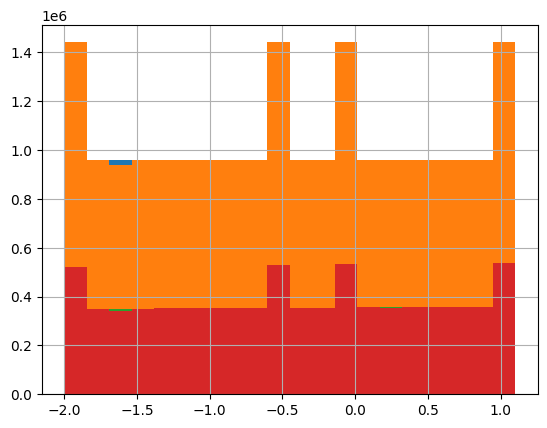

In [38]:
for  level in (Names_of_Levels().generator, Names_of_Levels().detector):
    for trial_range in Raw_Signal_Trial_Ranges().tuple_:
        print(level, trial_range)
        Aggregated_Signal_Dataframe_Handler(
            path_to_main_datasets_dir=Paths_to_Directories().path_to_main_datasets_dir,
            level=level,
            trial_range=trial_range
        ).get_dataframe()[Names_of_Labels().unbinned].hist(bins=20)

In [15]:
dataframe = Aggregated_Signal_Dataframe_Handler(
    path_to_main_datasets_dir=Paths_to_Directories().path_to_main_datasets_dir,
    level=Names_of_Levels().detector,
    trial_range=Raw_Signal_Trial_Ranges().train
).get_dataframe()

dataframe = apply_q_squared_veto(dataframe, Names_of_q_Squared_Vetos().resonances)

label_counts = dataframe[Names_of_Labels().unbinned].value_counts()

label_counts.values.min()

# plt.scatter(label_counts.index, label_counts.values)
# plt.ylim(0, 180_000)

np.int64(159515)

In [30]:
dataframe

,q_squared,costheta_mu,costheta_K,chi,dc9,dc9_bin_index
0,2.923588,0.410200,0.972397,1.926879,-0.01,27
1,2.876313,-0.012163,0.395988,4.557953,-0.01,27
2,18.961957,-0.050265,0.827746,1.587596,-0.01,27
3,3.344651,0.174485,0.984753,1.401428,-0.01,27
4,14.531015,0.589343,0.685277,1.866032,-0.01,27
...,...,...,...,...,...,...
8990,19.163194,-0.040717,-0.692058,4.450255,1.10,43
8991,14.909839,-0.085245,0.014305,1.221083,1.10,43
8992,5.536884,0.654435,-0.825654,4.633005,1.10,43
8993,16.662516,0.096783,-0.790189,0.491373,1.10,43


In [ ]:
def reduce_num_per_label_to_lowest(dataframe):

    num_lowest = dataframe[Names_of_Labels().unbinned].value_counts().values.max()
    get_subset = lambda x : x.iloc[:num_lowest]
    dataframe = (
        dataframe.groupby(Names_of_Labels().unbinned, group_keys=False)[dataframe.columns]
        .apply(get_subset)
    )
    return dataframe

reduce_num_per_label_to_lowest(dataframe)

170912


,q_squared,costheta_mu,costheta_K,chi,dc9,dc9_bin_index
0,14.229128,0.909718,0.019379,2.887177,-2.00,0
0,16.289422,0.794715,-0.469062,0.860444,-2.00,0
0,7.232186,-0.757619,0.567033,5.534173,-2.00,0
0,16.352609,0.583625,0.331892,2.905804,-2.00,0
0,10.479632,-0.552742,-0.793383,0.576109,-2.00,0
...,...,...,...,...,...,...
9120,2.430521,-0.275164,-0.962866,3.399410,0.29,32
9121,10.633638,0.454033,-0.650919,1.031620,0.29,32
9122,1.181908,0.301804,-0.815208,3.615059,0.29,32
9123,3.896743,-0.740041,-0.816052,0.122472,0.29,32
